In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mean_1=np.array([12,19])
mean_2=np.array([-10,-20])

In [3]:
cov_1=np.array([[1,15],[15,1]])
cov_2=np.array([[1,10],[10,1]])

In [4]:
dist_1 = np.random.multivariate_normal(mean_1,cov_1,size=1000)
dist_2 = np.random.multivariate_normal(mean_2,cov_2,size=1000)

C:\Users\Pratham Bisht\AppData\Local\Temp\ipykernel_24352\1536199149.py:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  dist_1 = np.random.multivariate_normal(mean_1,cov_1,size=1000)
C:\Users\Pratham Bisht\AppData\Local\Temp\ipykernel_24352\1536199149.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  dist_2 = np.random.multivariate_normal(mean_2,cov_2,size=1000)


In [5]:
dist_1.shape, dist_2.shape

((1000, 2), (1000, 2))

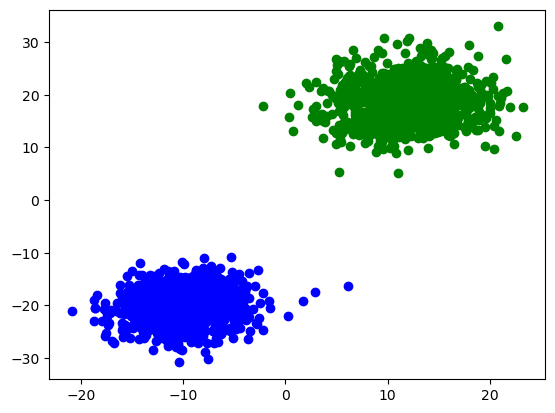

In [6]:
plt.scatter(dist_1[:, 0],dist_1[:,1],c='green')
plt.scatter(dist_2[:, 0],dist_2[:,1],c='blue')
plt.show()

In [7]:
dataset = np.zeros((2000, 3))

dataset[:1000, :-1] = dist_1 # First 1000 rows and first 2 cols are part of dist_1
dataset[1000:, :-1] = dist_2 # last 1000 rows and first 2 cols are part of dist_2

#Last col is 0 so we kept first 1000 values of last col as 0 and last 1000 values as 1 because label of every datapoint is not 0
dataset[1000:, -1] = 1      

In [8]:
u = np.mean(dataset[:, : -1], axis = 0)
std = np.std(dataset[:, : -1], axis = 0)
dataset[:, : -1] = (dataset[:, : -1] - u)/std

In [9]:
ones = np.ones((dataset.shape[0], 1))
dataset = np.hstack((ones, dataset))

In [10]:
''' This is because when we train a 2yr old to recognize cat and dog ,we dont first show them all the photos of cat or all 
the photos of dog we show shuffled photo like 1 of dog then cat then dog then again cat.'''

np.random.shuffle(dataset)

In [11]:
print(dataset[:10])

[[ 1.         -0.8300418  -0.81934912  1.        ]
 [ 1.          0.9700301   1.00856557  0.        ]
 [ 1.          1.20840583  1.24851481  0.        ]
 [ 1.         -0.86505688 -1.13045199  1.        ]
 [ 1.         -0.8022149  -0.96786687  1.        ]
 [ 1.          1.17182248  1.17893675  0.        ]
 [ 1.          1.64710183  0.85584024  0.        ]
 [ 1.          0.82638628  1.04940033  0.        ]
 [ 1.          0.82025475  0.92440224  0.        ]
 [ 1.         -0.79057974 -0.89830908  1.        ]]


In [12]:
split = 0.8

train_X = dataset[:int(split * dataset.shape[0]), :-1]
test_X = dataset[int(split * dataset.shape[0]):, :-1]
train_Y = dataset[:int(split * dataset.shape[0]), -1]
test_Y = dataset[int(split * dataset.shape[0]):, -1]

In [13]:
print(train_X.shape, test_X.shape, train_Y.shape, test_Y.shape)

(1600, 3) (400, 3) (1600,) (400,)


In [14]:
def hypothesis(X, weights):
    return 1 / (1 + np.exp(-1 * np.dot(X, weights)))

In [15]:
def loss_func(X, weights, Y):
    Y_pred = hypothesis(X, weights)
    loss = np.mean(Y * np.log(Y_pred) + (1 - Y) * np.log(1 - Y_pred))
    return -1 * loss

In [16]:
def gradient(X, Y, weight):
    y_pred = hypothesis(X, weight)
    grad = np.dot(X.T, (Y - y_pred))
        
    return grad/X.shape[0]

In [17]:
def gradient_descent(X, Y):
    weights = np.zeros((X.shape[1], ))
    lr_rate = 0.03
    loss_epoch = []
    
    epochs = 10000
    
    for i in range(epochs):
        
        grad = gradient(X, Y, weights)
        
        loss_epoch.append(loss_func(X, weights, Y))
        
        weights = weights + lr_rate * grad
        
    return weights, loss_epoch

In [18]:
import time
start = time.time()
weights, loss_epoch = gradient_descent(train_X, train_Y)
print(time.time() - start)

0.8910675048828125


[]

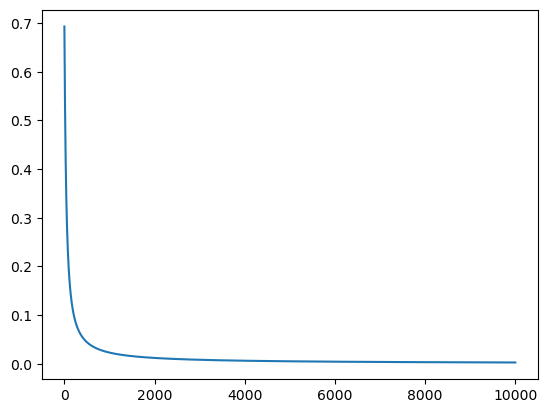

In [19]:
plt.plot(loss_epoch)
plt.plot()

In [20]:
loss_epoch[:5]

[0.6931471805599452,
 0.6791247072942765,
 0.6655088692749138,
 0.6522876480281304,
 0.6394492205963128]

In [21]:
weights

array([-0.09213871, -3.16923531, -3.66660064])

In [22]:
X=np.arange(-20,30)

In [23]:
Y=-(weights[1]*X + weights[0])/weights[2]

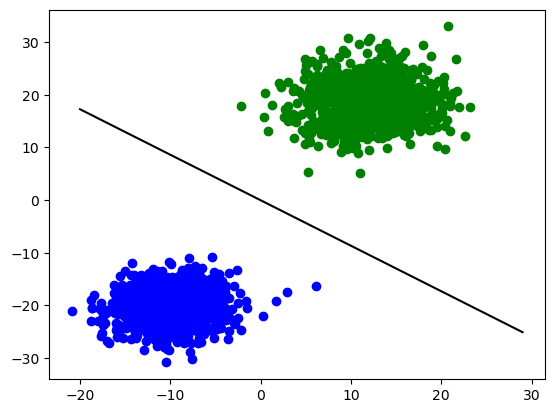

In [24]:
plt.scatter(dist_1[:, 0],dist_1[:,1],c='green')
plt.scatter(dist_2[:, 0],dist_2[:,1],c='blue')
plt.plot(X,Y,c='black')
plt.show()

In [25]:
def predict(X,weights):
    pred=hypothesis(X,weights)
#     print(pred)
    if pred>0.5:
        return 1
    else:
        return 0

In [26]:
print(predict(test_X[11],weights),test_Y[11])

0 0.0


In [27]:
for i in range(test_X.shape[0]):
    print(predict(test_X[i],weights),test_Y[i])

1 1.0
1 1.0
1 1.0
1 1.0
0 0.0
1 1.0
0 0.0
0 0.0
0 0.0
1 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
0 0.0
0 0.0
0 0.0
1 1.0
1 1.0
0 0.0
1 1.0
1 1.0
1 1.0
0 0.0
1 1.0
1 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 1.0
0 0.0
0 0.0
1 1.0
1 1.0
0 0.0
0 0.0
0 0.0
1 1.0
0 0.0
0 0.0
1 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 1.0
0 0.0
1 1.0
0 0.0
0 0.0
0 0.0
1 1.0
1 1.0
1 1.0
0 0.0
0 0.0
0 0.0
0 0.0
1 1.0
0 0.0
1 1.0
1 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 1.0
1 1.0
1 1.0
0 0.0
1 1.0
0 0.0
0 0.0
1 1.0
0 0.0
1 1.0
1 1.0
0 0.0
0 0.0
1 1.0
0 0.0
0 0.0
1 1.0
0 0.0
1 1.0
1 1.0
1 1.0
1 1.0
0 0.0
1 1.0
1 1.0
0 0.0
0 0.0
0 0.0
0 0.0
1 1.0
1 1.0
0 0.0
0 0.0
1 1.0
0 0.0
1 1.0
0 0.0
0 0.0
0 0.0
0 0.0
1 1.0
1 1.0
0 0.0
1 1.0
1 1.0
0 0.0
1 1.0
1 1.0
0 0.0
0 0.0
1 1.0
0 0.0
0 0.0
0 0.0
0 0.0
1 1.0
1 1.0
0 0.0
1 1.0
1 1.0
0 0.0
1 1.0
1 1.0
0 0.0
0 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
0 0.0
1 1.0
0 0.0
0 0.0
0 0.0
1 1.0
1 1.0
0 0.0
0 0.0
1 1.0
0 0.

In [28]:
corr=0

for i in range(test_X.shape[0]):
    pred=predict(test_X[i],weights)
    if pred==test_Y[i]:
        corr+=1
print(corr/test_X.shape[0])

1.0
